In [5]:
from image_classification import generate_dataset
import torch

In [6]:
##data generation
images , lables = generate_dataset(img_size= 10 , n_images= 1000, binary= False, seed= 17)

In [7]:
import matplotlib.pyplot as plt 


In [13]:
import torchvision.transforms as transforms 
toimage = transforms.ToPILImage()
toimage(images[0])


ValueError: pic should not have > 4 channels. Got 10 channels.

In [9]:
images[0].shape

(1, 10, 10)

In [23]:
single_channel_image = images[0].squeeze(0)

In [24]:
img = toimage(single_channel_image)

In [25]:
img.show()

In [26]:
single_channel_image = images[0][0, :, :]  # Extract the first channel

In [30]:
import matplotlib.pyplot as plt
import matplotlib  
def plot_images(image, lables, n_plot= 5):

    n_plot = min(n_plot , len(images))

    cols = 5 
    rows = (n_plot + cols -1 ) // cols 

    #plt 
    fig, axes = plt.subplots(rows, cols, figsize= (15, rows*3))
    axes = axes.flattern()     

AttributeError: 'numpy.ndarray' object has no attribute 'flattern'

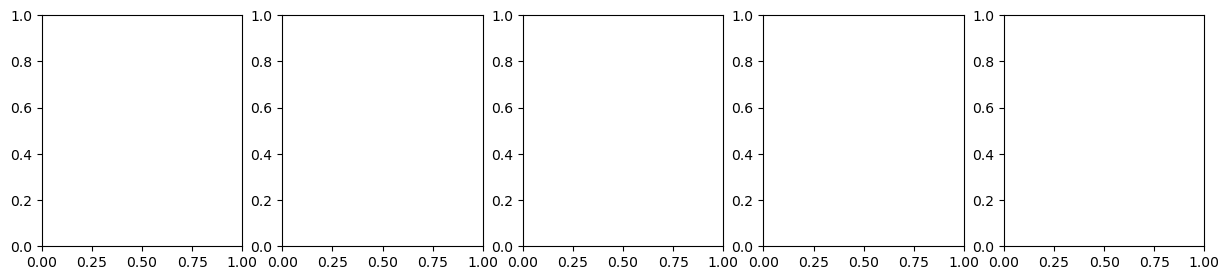

In [31]:
plot_images(image= img , lables='jpt')

In [75]:
from torch.utils.data import DataLoader

In [33]:
#index splitter 
from torch.utils.data import random_split
def index_splitter(n, splits ,seed = 13):
    idx = torch.arange(n)
    splits_tensors=  torch.as_tensor(splits)
    multiplier = n / splits_tensors.sum()
    splits_tensors= (multiplier * splits_tensors).long() 
    diff = n - splits_tensors.sum()
    splits_tensors[0] = splits[0] + diff

    torch.manual_seed(seed)
    return random_split(idx, splits_tensors)

In [35]:
from torch.utils.data import Dataset

In [36]:
## data preparation
class TransformedDataset(Dataset):
    def __init__(self, X, Y, transform= None):
        self.x = X
        self.y = Y
        self.transform = transform

    def __getitem__(self, index):
        if self.transform:
            X = self.x[index]
        return X, self.y[index]
    
    def __len__(self):
        return len(self.x)
    

In [39]:
from torch.utils.data  import random_split



In [77]:
from torch.utils.data import WeightedRandomSampler

## Data Preparation

In [83]:
from torchvision.transforms import Compose

#convert into tensor
x_tensor= torch.as_tensor(images/255).float() 
y_tensor=torch.as_tensor(lables).long()

#index splitter
train_idx, val_idx = index_splitter(len(x_tensor) , [80,20])
def index_splitter(n, splits, seed=13):
    idx = torch.arange(n)

    splits_tensor = torch.as_tensor(splits)
   
    multiplier = n / splits_tensor.sum()    
    splits_tensor = (multiplier * splits_tensor).long()
    
    diff = n - splits_tensor.sum()
    splits_tensor[0] += diff

    torch.manual_seed(seed)
    return random_split(idx, splits_tensor)

#use indicies to perform splits
x_train_tensor= x_tensor[train_idx]
y_train_tensor= y_tensor[train_idx]
x_val_tensor= x_tensor[val_idx]
y_val_tensor=y_tensor[val_idx]


train_compose= Compose( [transforms.Normalize(mean = (.5), std=(.5))])
val_compose = Compose([transforms.Normalize(mean= (.5), std=(.5))])

#use custom dataset to apply composed transfors to each set
train_dataset = TransformedDataset(X = x_train_tensor, Y =  y_train_tensor, transform= train_compose)
val_dataset = TransformedDataset(X = y_val_tensor, Y = y_val_tensor, transform= val_compose)

#builds a weighted random sampler to handel imblanced classes 

def make_balanced_sampler(y):
    # Computes weights for compensating imbalanced classes
    classes, counts = y.unique(return_counts=True)
    weights = 1.0 / counts.float()
    sample_weights = weights[y.squeeze().long()]
    # Builds sampler with compute weights
    generator = torch.Generator()
    sampler = WeightedRandomSampler(
        weights=sample_weights,
        num_samples=len(sample_weights),
        generator=generator,
        replacement=True
    )
    return sampler

sampler= make_balanced_sampler(y_train_tensor)

#uses sampelr in the training set to get a balanced data loader 
train_loader= DataLoader(dataset= train_dataset,
                         batch_size= 16,
                         sampler= sampler)
    
val_loader = DataLoader(dataset= val_dataset, 
                        batch_size= 16)


In [ ]:

def make_balanced_sampler(y):
    # Computes weights for compensating imbalanced classes
    classes, counts = y.unique(return_counts=True)
    weights = 1.0 / counts.float()
    sample_weights = weights[y.squeeze().long()]
    # Builds sampler with compute weights
    generator = torch.Generator()
    sampler = WeightedRandomSampler(
        weights=sample_weights,
        num_samples=len(sample_weights),
        generator=generator,
        replacement=True
    )
    return sampler

In [58]:
y_train_tensor.shape

torch.Size([800])

In [63]:
w[y_train_tensor.long()]

tensor([0.0034, 0.0038, 0.0034, 0.0038, 0.0034, 0.0041, 0.0041, 0.0034, 0.0038,
        0.0038, 0.0034, 0.0034, 0.0041, 0.0034, 0.0034, 0.0041, 0.0034, 0.0038,
        0.0041, 0.0034, 0.0041, 0.0034, 0.0034, 0.0041, 0.0038, 0.0041, 0.0038,
        0.0034, 0.0034, 0.0034, 0.0041, 0.0038, 0.0034, 0.0034, 0.0038, 0.0041,
        0.0038, 0.0038, 0.0034, 0.0038, 0.0034, 0.0041, 0.0038, 0.0034, 0.0034,
        0.0034, 0.0041, 0.0038, 0.0041, 0.0038, 0.0038, 0.0034, 0.0034, 0.0034,
        0.0038, 0.0034, 0.0041, 0.0041, 0.0038, 0.0038, 0.0041, 0.0041, 0.0038,
        0.0034, 0.0041, 0.0034, 0.0034, 0.0034, 0.0041, 0.0041, 0.0034, 0.0038,
        0.0038, 0.0034, 0.0034, 0.0038, 0.0034, 0.0038, 0.0038, 0.0038, 0.0038,
        0.0041, 0.0034, 0.0034, 0.0038, 0.0034, 0.0041, 0.0038, 0.0038, 0.0034,
        0.0034, 0.0038, 0.0041, 0.0038, 0.0034, 0.0034, 0.0041, 0.0041, 0.0041,
        0.0038, 0.0041, 0.0034, 0.0034, 0.0034, 0.0038, 0.0034, 0.0041, 0.0041,
        0.0038, 0.0038, 0.0041, 0.0034, 

In [64]:
w

tensor([0.0038, 0.0034, 0.0041])

In [68]:
w[torch.tensor(0)]

tensor(0.0038)